Приветсвуем всех любителей тру крайма!
Сегодня мы будем анализировать базу данных "Отчеты об убийствах, 1980-2014 гг. в США"

Проект подотчетности за убийство является самой полной базой данных об убийствах
в Соединенных Штатах, доступной в настоящее время. Этот набор данных включает в себя убийства 
из Дополнительного отчета ФБР об убийствах с 1976 года по настоящее время и данные 
Закона о свободе информации о более чем 22 000 убийствах, о которых не было сообщено в Министерство юстиции.
Этот набор данных включает в себя возраст, расу, пол, этническую принадлежность жертв и преступников,
в дополнение к отношениям между жертвой и преступником и используемым оружием.



In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('database.csv')

/Users/mcndrw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [4]:
data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [14]:
data.shape

(638454, 24)

In [5]:
# мы изменили тип данных, а также поставили нули там, где возраст - пустая строка, чтобы показать, что значения нет (пропуск)
def int_(x):
    try:
        return int(x)
    except:
        return 0
data['Perpetrator Age']=data['Perpetrator Age'].apply(int_)

# Фильтрация 

1. Сколько же было несовершеннолетних преступников, то есть младше 18? Убираем нули, так как это неизвестные возрасты преступников.

In [13]:
data[(data['Perpetrator Age'] < 18) &(data['Perpetrator Age'] != 0)]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
31,32,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,June,1,Manslaughter by Negligence,...,Unknown,Male,7,Asian/Pacific Islander,Unknown,Sister,Rifle,0,0,FBI
35,36,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,August,1,Murder or Manslaughter,...,Unknown,Male,17,Native American/Alaska Native,Unknown,Unknown,Rifle,0,0,FBI
60,61,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,November,1,Manslaughter by Negligence,...,Not Hispanic,Male,15,White,Not Hispanic,Friend,Shotgun,0,0,FBI
86,87,AL00102,Birmingham,Municipal Police,Jefferson,Alabama,1980,February,3,Murder or Manslaughter,...,Unknown,Female,17,Black,Unknown,Acquaintance,Shotgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638355,638356,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,1,Murder or Manslaughter,...,Unknown,Male,17,Black,Unknown,Stranger,Handgun,0,0,FBI
638360,638361,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,6,Murder or Manslaughter,...,Unknown,Male,17,Black,Unknown,Stranger,Handgun,0,0,FBI
638370,638371,WV00500,Brooke County,Sheriff,Brooke,West Virginia,2014,May,1,Murder or Manslaughter,...,Unknown,Female,16,White,Unknown,Father,Blunt Object,0,0,FBI
638441,638442,WY00300,Campbell County,Sheriff,Campbell,Wyoming,2014,February,1,Murder or Manslaughter,...,Not Hispanic,Male,15,White,Not Hispanic,Acquaintance,Handgun,0,0,FBI


In [15]:
33967/638454*100

5.320195346884819

5% преступлений (то есть 33967 из 638454) совершили несовершенноление, младше 18 лет.

2. Интересно посмотреть, против кого совершались эти преступления: против несовершеннолетних или более старших людей?

In [20]:
data[(data['Perpetrator Age'] < 18) &(data['Perpetrator Age'] != 0) & (data['Victim Age'] < 18)]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
31,32,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,June,1,Manslaughter by Negligence,...,Unknown,Male,7,Asian/Pacific Islander,Unknown,Sister,Rifle,0,0,FBI
60,61,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,November,1,Manslaughter by Negligence,...,Not Hispanic,Male,15,White,Not Hispanic,Friend,Shotgun,0,0,FBI
129,130,AL00102,Birmingham,Municipal Police,Jefferson,Alabama,1980,August,6,Murder or Manslaughter,...,Not Hispanic,Male,17,White,Not Hispanic,Acquaintance,Shotgun,0,0,FBI
150,151,AL00102,Birmingham,Municipal Police,Jefferson,Alabama,1980,November,2,Murder or Manslaughter,...,Not Hispanic,Male,16,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638122,638123,WA03105,Marysville,Municipal Police,Snohomish,Washington,2014,October,1,Murder or Manslaughter,...,Not Hispanic,Male,15,Native American/Alaska Native,Not Hispanic,Friend,Handgun,2,0,FBI
638123,638124,WA03105,Marysville,Municipal Police,Snohomish,Washington,2014,November,1,Murder or Manslaughter,...,Not Hispanic,Male,15,Native American/Alaska Native,Not Hispanic,Family,Handgun,0,0,FBI
638337,638338,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,September,1,Murder or Manslaughter,...,Unknown,Male,16,Black,Unknown,Stranger,Handgun,0,2,FBI
638355,638356,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,1,Murder or Manslaughter,...,Unknown,Male,17,Black,Unknown,Stranger,Handgun,0,0,FBI


In [21]:
10730/33967*100

31.589483910854653

32% преступлений из тех, которые были совершены преступниками младше 18,и направлены против несовершеннолетних. Получается, что оставшиеся 68% преступлений были направлены на более старших жертв. Видим интересную закономерность: несовершеннолетние чаще всего совершают преступления против старших

3. Самый интересный вопрос. Кто убивает чаще: мужчины или женщины? Отчаянные домохозяйки или агенты 007? 

In [31]:
data['Perpetrator Sex'].unique()

array(['Male', 'Unknown', 'Female'], dtype=object)

In [26]:
data[data['Perpetrator Sex']=='Male']

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638446,638447,WY01300,Natrona County,Sheriff,Natrona,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Male,48,White,Not Hispanic,Mother,Handgun,0,0,FBI
638447,638448,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014,June,1,Murder or Manslaughter,...,Not Hispanic,Male,22,White,Unknown,Girlfriend,Handgun,0,0,FBI
638448,638449,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,...,Unknown,Male,67,Black,Unknown,Friend,Firearm,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI


In [27]:
data[data['Perpetrator Sex']=='Female']

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
15,16,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,3,Murder or Manslaughter,...,Unknown,Female,29,Black,Unknown,Ex-Husband,Handgun,0,0,FBI
27,28,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,February,2,Murder or Manslaughter,...,Unknown,Female,28,Native American/Alaska Native,Unknown,Husband,Handgun,0,0,FBI
28,29,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,February,3,Murder or Manslaughter,...,Unknown,Female,36,Native American/Alaska Native,Unknown,Brother,Rifle,0,0,FBI
46,47,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,December,2,Manslaughter by Negligence,...,Unknown,Female,27,Native American/Alaska Native,Unknown,Husband,Rifle,0,0,FBI
48,49,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,March,1,Murder or Manslaughter,...,Unknown,Female,38,White,Unknown,Husband,Shotgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638433,638434,WVWSP53,State Police: Upperglade,State Police,Webster,West Virginia,2014,March,1,Murder or Manslaughter,...,Unknown,Female,30,White,Unknown,Friend,Unknown,0,0,FBI
638434,638435,WVWSP55,State Police: Welch,State Police,McDowell,West Virginia,2014,October,1,Murder or Manslaughter,...,Unknown,Female,35,White,Unknown,Unknown,Firearm,1,2,FBI
638435,638436,WVWSP55,State Police: Welch,State Police,McDowell,West Virginia,2014,October,1,Murder or Manslaughter,...,Unknown,Female,35,White,Unknown,Unknown,Firearm,1,2,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI


In [29]:
48548/638454*100

7.603993396548538

In [30]:
399541/638454*100

62.57944973326192

По общим данным всех годов получается, что мужчины совершают преступления почти в 8 раз чаще, чем женщины (женщины совершили 48548 преступлений - 7.6%, а мужчины - 399541 - 62.6% преступлений )

4. А если пол неизвестен, получается, что преступление не раскрыто?

In [33]:
data[(data['Perpetrator Sex']=='Unknown')].shape[0]

190365

In [32]:
data[(data['Perpetrator Sex']=='Unknown')&(data['Crime Solved']=='No')]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
10,11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
14,15,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638418,638419,WV04401,Spencer,Municipal Police,Roane,West Virginia,2014,May,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
638436,638437,WVWSP60,State Police: Williamson,State Police,Mingo,West Virginia,2014,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Drugs,0,1,FBI
638437,638438,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,1,Murder or Manslaughter,...,Unknown,Unknown,30,Unknown,Unknown,Acquaintance,Knife,0,2,FBI
638438,638439,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,2,Murder or Manslaughter,...,Unknown,Unknown,50,Unknown,Unknown,Acquaintance,Knife,0,2,FBI


In [35]:
190218/190365*100

99.92277992277992

Более 99.9% преступлений, совершенных неизвестным полом, не раскрыты. Мы оказались правы. 

In [34]:
data[(data['Perpetrator Sex']=='Unknown')&(data['Crime Solved']=='Yes')]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
405788,405789,FL01300,Miami-Dade,County Police,Dade,Florida,2000,July,55,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0,FOIA
405796,405797,FL01300,Miami-Dade,County Police,Dade,Florida,2000,August,63,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0,FOIA
405972,405973,FL01602,Jacksonville,Municipal Police,Duval,Florida,2000,January,239,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0,FOIA
406255,406256,FL04800,Orange County,Sheriff,Orange,Florida,2000,September,522,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0,FOIA
406259,406260,FL04800,Orange County,Sheriff,Orange,Florida,2000,October,526,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,1,0,FOIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627925,627926,FL05027,Palm Springs,Municipal Police,Palm Beach,Florida,2014,October,978,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Blunt Object,1,0,FOIA
627977,627978,FL05214,St. Petersburg,Municipal Police,Pinellas,Florida,2014,January,30,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,1,0,FOIA
628035,628036,FL05601,Fort Pierce,Municipal Police,St. Lucie,Florida,2014,January,88,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0,FOIA
628040,628041,FL05601,Fort Pierce,Municipal Police,St. Lucie,Florida,2014,April,93,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0,FOIA


Оставшийся 0.01% раскрытых преступлений имеют, видимо, закрытые данные, так как видим, что многие поля имеют статус Unknown 

5. В какой год преступления совершались чаще всего? 

In [36]:
data['Year'].mode()

0    1993
dtype: int64

Чаще всего преступления совершались в 1993 году

In [37]:
data[data['Year']==1993]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
266227,266228,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,May,2,Murder or Manslaughter,...,Unknown,Male,20,Black,Unknown,Sister,Handgun,1,0,FBI
266228,266229,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,January,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
266229,266230,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,February,1,Murder or Manslaughter,...,Unknown,Female,39,White,Unknown,Boyfriend,Knife,0,0,FBI
266230,266231,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,February,2,Manslaughter by Negligence,...,Unknown,Female,20,Native American/Alaska Native,Unknown,Son,Drowning,0,0,FBI
266231,266232,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,March,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290557,290558,WY01600,Platte,Sheriff,Platte,Wyoming,1993,May,1,Murder or Manslaughter,...,Unknown,Female,19,White,Unknown,Boyfriend,Rifle,0,0,FBI
290558,290559,WY01800,Sublette,Sheriff,Sublette,Wyoming,1993,September,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI
290559,290560,WY01900,Sweetwater,Sheriff,Sweetwater,Wyoming,1993,January,1,Murder or Manslaughter,...,Unknown,Male,28,White,Unknown,Stranger,Blunt Object,0,0,FBI
290560,290561,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,1993,March,1,Murder or Manslaughter,...,Unknown,Female,20,White,Unknown,Daughter,Unknown,0,0,FBI


In [38]:
24335/638454*100

3.811551027951896

24335 преступлений были совершены в самый "популярный" год в наших данных. Это почти 4% от всех данных. 

6. А  в каких штатах в 1993 году В "популярном" 1993 году чаще всего  совершались преступления? Выведите топ 5. 

In [39]:
data[data['Year']==1993]['State'].value_counts()

California              4369
New York                2511
Texas                   2271
Florida                 1329
Illinois                1013
Michigan                 976
Pennsylvania             834
Louisiana                800
North Carolina           796
Georgia                  764
Maryland                 662
Ohio                     631
Missouri                 560
Virginia                 559
Alabama                  477
Tennessee                468
New Jersey               433
District of Columbia     423
South Carolina           392
Indiana                  368
Arizona                  362
Oklahoma                 301
Washington               287
Arkansas                 264
Wisconsin                241
Kentucky                 240
Mississippi              234
Connecticut              222
Colorado                 221
Massachusetts            210
Oregon                   154
Minnesota                140
Nevada                   137
West Virginia            129
New Mexico    

В "популярном" 1993 году преступления совершались в разных штатах, в топ-5 попали: Калифорния, Нью-Йорк, Техас, Флорида и Иллинойс. Меньше в штате Мэн

7. Кто чаще совершал преступления в 1993 году? 

In [40]:
data[data['Year']==1993]['Perpetrator Sex'].value_counts()

Male       14842
Unknown     7900
Female      1593
Name: Perpetrator Sex, dtype: int64

В "популярном" 1993 году преступления совершали чаще всего мужчины, в 14 раз меньше - женщины

8. А против кого чаще всего совершались преступления? 

In [41]:
data[(data['Year']==1993) & (data['Victim Sex']=='Female')]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
266227,266228,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,May,2,Murder or Manslaughter,...,Unknown,Male,20,Black,Unknown,Sister,Handgun,1,0,FBI
266235,266236,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,May,2,Murder or Manslaughter,...,Unknown,Male,20,Black,Unknown,Sister,Handgun,1,0,FBI
266237,266238,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,May,4,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
266238,266239,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,May,5,Murder or Manslaughter,...,Unknown,Female,22,Native American/Alaska Native,Unknown,Stranger,Unknown,0,0,FBI
266247,266248,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1993,October,4,Murder or Manslaughter,...,Unknown,Male,32,Black,Unknown,Acquaintance,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290553,290554,WY01200,Lincoln,Sheriff,Lincoln,Wyoming,1993,May,1,Murder or Manslaughter,...,Unknown,Male,47,White,Unknown,Family,Handgun,0,0,FBI
290555,290556,WY01301,Casper,Municipal Police,Natrona,Wyoming,1993,November,1,Murder or Manslaughter,...,Unknown,Male,17,White,Unknown,Stranger,Knife,0,3,FBI
290559,290560,WY01900,Sweetwater,Sheriff,Sweetwater,Wyoming,1993,January,1,Murder or Manslaughter,...,Unknown,Male,28,White,Unknown,Stranger,Blunt Object,0,0,FBI
290560,290561,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,1993,March,1,Murder or Manslaughter,...,Unknown,Female,20,White,Unknown,Daughter,Unknown,0,0,FBI


In [42]:
5349/24335*100

21.980686254366137

22%  преступлений в "популярный" 1993 год точно совершены против женщин (есть точная информация). Мы ожидали, что этот процент будет больше

# Создание нового столбца и применение с ним фильтрации

In [5]:
data['Relationship'].unique()

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger', 'Girlfriend',
       'Ex-Husband', 'Brother', 'Stepdaughter', 'Husband', 'Sister',
       'Friend', 'Family', 'Neighbor', 'Father', 'In-Law', 'Son',
       'Ex-Wife', 'Boyfriend', 'Mother', 'Common-Law Husband',
       'Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother',
       'Daughter', 'Boyfriend/Girlfriend', 'Employer', 'Employee'],
      dtype=object)

In [6]:
family_members = ['Ex-Husband', 'Wife', 'Brother', 'Stepdaughter', 'Husband', 'Sister', 'Family', 'Father', 'In-Law', 'Son','Ex-Wife', 'Mother', 'Common-Law Husband','Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother','Daughter']
data['Victim_is_Family_member']=data['Relationship'].apply(lambda x: 'Yes' if x in family_members else 'No')

Мы посмотрели, какие типы отношений существуют в таблице, выделили в список family_members тех, кто является членом семьи, далее создали столбец Victim_is_Family_member, где пропишем 'Yes', если жертва является для преступника членом семьи и 'No' в ином случае 

In [7]:
data[(data['Crime Solved']== 'Yes') & (data['Perpetrator Count']>1)]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Victim_is_Family_member
57,58,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,August,3,Murder or Manslaughter,...,Male,22,Black,Unknown,Stranger,Handgun,0,2,FBI,No
169,170,AL00105,Gardendale,Municipal Police,Jefferson,Alabama,1980,July,2,Murder or Manslaughter,...,Male,32,White,Not Hispanic,Stranger,Handgun,0,3,FBI,No
419,420,AL03900,Jackson,Sheriff,Jackson,Alabama,1980,October,1,Murder or Manslaughter,...,Male,32,White,Unknown,Acquaintance,Blunt Object,0,4,FBI,No
423,424,AL04100,Lauderdale,Sheriff,Lauderdale,Alabama,1980,February,1,Murder or Manslaughter,...,Female,22,White,Not Hispanic,Acquaintance,Blunt Object,0,2,FBI,No
444,445,AL04400,Limestone,Sheriff,Limestone,Alabama,1980,September,1,Murder or Manslaughter,...,Male,33,White,Not Hispanic,Acquaintance,Shotgun,0,5,FBI,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638410,638411,WV03400,Nicholas County,Sheriff,Nicholas,West Virginia,2014,June,1,Murder or Manslaughter,...,Male,26,White,Unknown,Acquaintance,Unknown,0,3,FBI,No
638421,638422,WV05000,Wayne County,Sheriff,Wayne,West Virginia,2014,November,1,Murder or Manslaughter,...,Male,20,White,Unknown,Acquaintance,Knife,0,2,FBI,No
638434,638435,WVWSP55,State Police: Welch,State Police,McDowell,West Virginia,2014,October,1,Murder or Manslaughter,...,Female,35,White,Unknown,Unknown,Firearm,1,2,FBI,No
638435,638436,WVWSP55,State Police: Welch,State Police,McDowell,West Virginia,2014,October,1,Murder or Manslaughter,...,Female,35,White,Unknown,Unknown,Firearm,1,2,FBI,No


Получается, что 24601 преступлений были раскрыты при условии, что преступников было больше одного. 
Теперь посмотрим, против кого чаще всего были соверешены преступления. Против членов семьи или посторонних людей? 
Обратимся к новому столбцу Victim_is_Family_member, который мы создали ранее. против кого чаще всего направлено преступление (против семьи или против незнакомцев - по новому столбцу)

In [8]:
data[(data['Crime Solved']== 'Yes') & (data['Perpetrator Count']>1) & (data['Victim_is_Family_member']=='Yes')]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Victim_is_Family_member
2542,2543,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1980,June,57,Murder or Manslaughter,...,Female,23,Black,Unknown,Common-Law Husband,Shotgun,0,3,FBI,Yes
2690,2691,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1980,August,7,Murder or Manslaughter,...,Male,15,Black,Not Hispanic,Brother,Firearm,0,2,FBI,Yes
2942,2943,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1980,October,41,Murder or Manslaughter,...,Female,33,White,Hispanic,Daughter,Blunt Object,0,2,FBI,Yes
3082,3083,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1980,December,8,Murder or Manslaughter,...,Male,28,White,Hispanic,In-Law,Knife,0,2,FBI,Yes
5276,5277,FL00507,Melbourne,Municipal Police,Brevard,Florida,1980,March,1,Murder or Manslaughter,...,Female,36,White,Not Hispanic,Husband,Blunt Object,0,2,FBI,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635997,635998,TN06500,Morgan County,Sheriff,Morgan,Tennessee,2014,June,1,Murder or Manslaughter,...,Female,29,White,Unknown,Son,Unknown,0,2,FBI,Yes
636527,636528,TX10100,Harris County,Sheriff,Harris,Texas,2014,May,1,Murder or Manslaughter,...,Male,17,White,Not Hispanic,Stepfather,Blunt Object,0,2,FBI,Yes
637563,637564,UT01101,Cedar City,Municipal Police,Iron,Utah,2014,October,1,Murder or Manslaughter,...,Female,18,Native American/Alaska Native,Unknown,Stepfather,Rifle,0,2,FBI,Yes
637755,637756,VA08300,Russell County,Sheriff,Russell,Virginia,2014,January,2,Murder or Manslaughter,...,Female,27,White,Unknown,Brother,Unknown,0,2,FBI,Yes


In [9]:
673/24601*100

2.735661151985692

In [11]:
data[(data['Crime Solved']== 'Yes') & (data['Perpetrator Count']>1) & (data['Victim_is_Family_member']=='Yes')]['Relationship'].value_counts()

Family                181
Husband               109
Son                    66
Mother                 57
Father                 45
Wife                   35
Brother                34
Daughter               32
In-Law                 28
Stepfather             26
Sister                 20
Ex-Husband             14
Common-Law Husband      8
Stepmother              5
Stepson                 5
Common-Law Wife         4
Ex-Wife                 3
Stepdaughter            1
Name: Relationship, dtype: int64

Почти 3% раскрытых преступлений,совершенных группой лиц больше 1, были направлены против членов семьи. При этом интересно, что чаще всего убивали видимо всю семью (значение Family намекает на это), на втором месте мужья 

# Сортировка

In [53]:
data.sort_values(['Year', 'Incident'], ascending=[True, False])

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
16293,16294,NY03030,New York,Municipal Police,New York,New York,1980,December,239,Manslaughter by Negligence,...,Unknown,Male,21,Black,Unknown,Friend,Handgun,0,0,FBI
16292,16293,NY03030,New York,Municipal Police,New York,New York,1980,December,238,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
16291,16292,NY03030,New York,Municipal Police,New York,New York,1980,December,237,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
16290,16291,NY03030,New York,Municipal Police,New York,New York,1980,December,236,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
16289,16290,NY03030,New York,Municipal Police,New York,New York,1980,December,235,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Stranger,Handgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,638454,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


К 1980 году в Нью-Йорке было совершено 239 преступлений (самый большой номер инцидента)

In [55]:
data.sort_values('Perpetrator Age', ascending=False)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
284238,284239,OH04807,Toledo,Municipal Police,Lucas,Ohio,1993,August,1,Murder or Manslaughter,...,Unknown,Unknown,99,Unknown,Unknown,Unknown,Handgun,0,1,FBI
284248,284249,OH04807,Toledo,Municipal Police,Lucas,Ohio,1993,October,4,Murder or Manslaughter,...,Unknown,Unknown,99,Unknown,Unknown,Stranger,Handgun,0,0,FBI
417054,417055,WV02500,Marion,Sheriff,Marion,West Virginia,2000,November,1,Murder or Manslaughter,...,Unknown,Male,99,White,Unknown,Stranger,Knife,0,0,FBI
634095,634096,OH02500,Franklin County,Sheriff,Franklin,Ohio,2014,July,1,Murder or Manslaughter,...,Unknown,Unknown,99,Unknown,Unknown,Unknown,Firearm,0,0,FBI
421347,421348,FL04102,Bradenton,Municipal Police,Manatee,Florida,2001,May,425,Murder or Manslaughter,...,Unknown,Unknown,99,Unknown,Unknown,Unknown,Knife,0,0,FOIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288218,288219,TXDPD00,Dallas,Municipal Police,Dallas,Texas,1993,January,24,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
288216,288217,TXDPD00,Dallas,Municipal Police,Dallas,Texas,1993,January,22,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
288215,288216,TXDPD00,Dallas,Municipal Police,Dallas,Texas,1993,January,21,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
288211,288212,TXDPD00,Dallas,Municipal Police,Dallas,Texas,1993,January,17,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI


При сортировке возраста преступника мы заметили, что есть странные возрасты 99, что также говорит о наличии иных пропусков в возрасте, кроме 0, который мы поставили изначальное

In [56]:
data.sort_values('Victim Count', ascending=False)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
330101,330102,OK05506,Oklahoma City,Municipal Police,Oklahoma,Oklahoma,1995,April,9,Murder or Manslaughter,...,Unknown,Male,27,White,Unknown,Stranger,Explosives,10,2,FBI
330157,330158,OK05506,Oklahoma City,Municipal Police,Oklahoma,Oklahoma,1995,April,19,Murder or Manslaughter,...,Unknown,Male,27,White,Unknown,Stranger,Explosives,10,2,FBI
268686,268687,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1993,October,4,Murder or Manslaughter,...,Hispanic,Male,25,White,Hispanic,Stranger,Fire,10,1,FBI
330184,330185,OK05506,Oklahoma City,Municipal Police,Oklahoma,Oklahoma,1995,April,6,Murder or Manslaughter,...,Unknown,Male,27,White,Unknown,Stranger,Explosives,10,2,FBI
330185,330186,OK05506,Oklahoma City,Municipal Police,Oklahoma,Oklahoma,1995,April,7,Murder or Manslaughter,...,Unknown,Male,27,White,Unknown,Stranger,Explosives,10,2,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220232,220233,AL05904,Alabaster,Municipal Police,Shelby,Alabama,1991,January,1,Murder or Manslaughter,...,Unknown,Male,30,Black,Unknown,Acquaintance,Handgun,0,0,FBI
220233,220234,AL05904,Alabaster,Municipal Police,Shelby,Alabama,1991,June,1,Murder or Manslaughter,...,Unknown,Male,0,Black,Unknown,Family,Knife,0,0,FBI
220234,220235,AL06000,Sumter,Sheriff,Sumter,Alabama,1991,March,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
220235,220236,AL06000,Sumter,Sheriff,Sumter,Alabama,1991,December,1,Murder or Manslaughter,...,Unknown,Male,40,Black,Unknown,Common-Law Wife,Handgun,0,0,FBI


Максимальное количество жертв равняется 10, при этом на них нападал 1 преступник или их было двое, видим также, что жертвы для преступников были незнакомцами. 

# 3 этап проекта - пункты 2-5

In [29]:
data_C=data[(data['Perpetrator Age']!=0) & (data['Victim Age']!=998)].corr()
del data_C['Record ID']
data_C[1:]

,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
Year,1.000000,0.133678,0.013266,0.018359,0.033746,0.083237
Incident,0.133678,1.000000,0.004983,0.007743,-0.013253,0.008538
Victim Age,0.013266,0.004983,1.000000,0.355570,-0.019893,-0.035154
Perpetrator Age,0.018359,0.007743,0.355570,1.000000,0.009774,-0.182037
Victim Count,0.033746,-0.013253,-0.019893,0.009774,1.000000,0.056383
Perpetrator Count,0.083237,0.008538,-0.035154,-0.182037,0.056383,1.000000


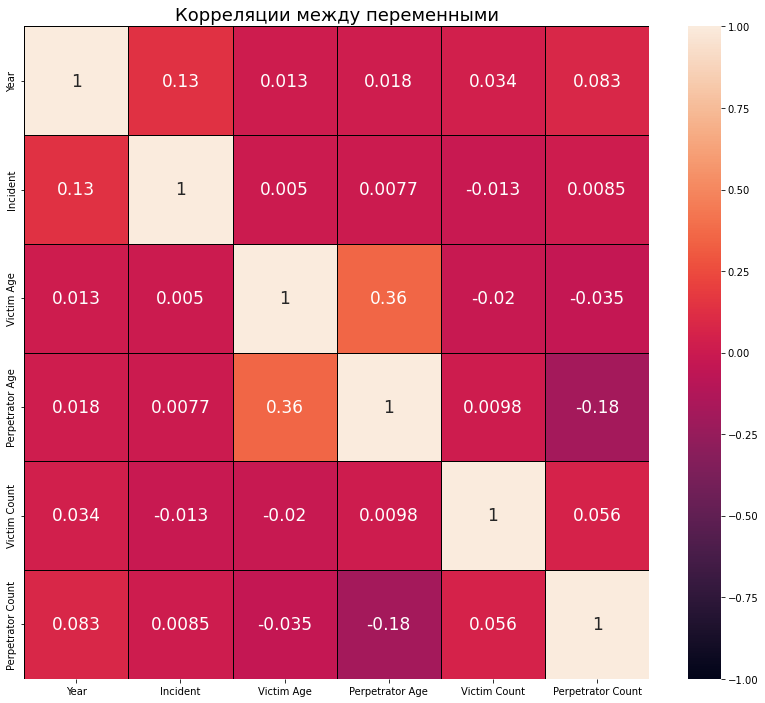

In [47]:
fig, ax = plt.subplots(figsize=[14,12])
ax.set_title('Корреляции между переменными', fontsize=18)
sns.heatmap(data_C[1:], annot = True, linecolor = 'black', linewidth = 0.75, annot_kws = {'size': 17}, cmap= 'rocket', vmin=-1, vmax = 1)
plt.show()

# комментарий: по каким столлбцам мы сделали корреляционную матрицу

1.Year - Incident

2.Year - Victim Age

3.Year - Perpetrator Age

4.Year-Victim Count

5.Year-Perpetrator Count

6.Incident-Victim Age

7.Incident-Perpetrator Age

8.Incident-Victim Count

9.Incident-Perpetrator Count

10.Victim Age-Perpetrator Age

11.Victim Age-Victim Count

12.Victim Age-Perpetrator Count

13.Perpetrator Age-Victim Count

14.Perpetrator Age-Perpetrator Count

15.Victim Count-Perpetrator Count

In [37]:
# избавляемся от неочевидных
data_c=data[(data['Perpetrator Age']!=0) & (data['Victim Age']!=998)]

1.Year - Incident

Коэффициент корреляции 0.13


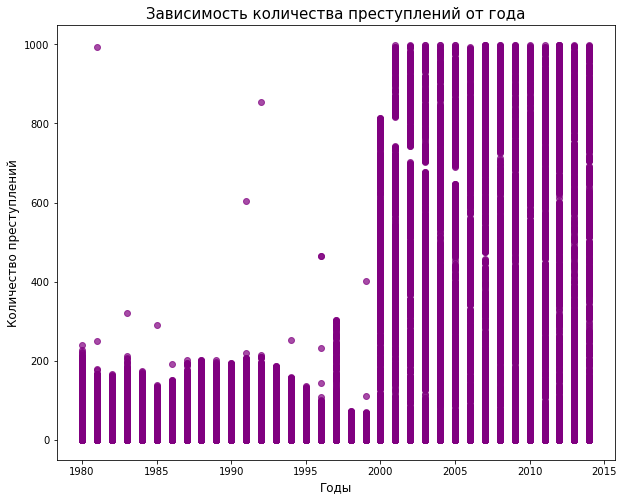

In [50]:
print('Коэффициент корреляции', 0.13)
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x = data_c['Year'], y = data_c['Incident'], alpha=0.7, c = 'purple')
ax.set_title('Зависимость количества преступлений от года', fontsize=15)
ax.set_xlabel('Годы', fontsize=12)
ax.set_ylabel('Количество преступлений', fontsize=12)
plt.show()

Между количеством преступлений и годом наблюдается низкая положительная взаимосвязь - кожффициент равен 0.13. То же самое мы видим и на графике рассеяния, где точки расположены наподобие столбчатой диаграммы, не вставая в линию

2. Year - Victim Age

Коэффициент корреляции 0.01


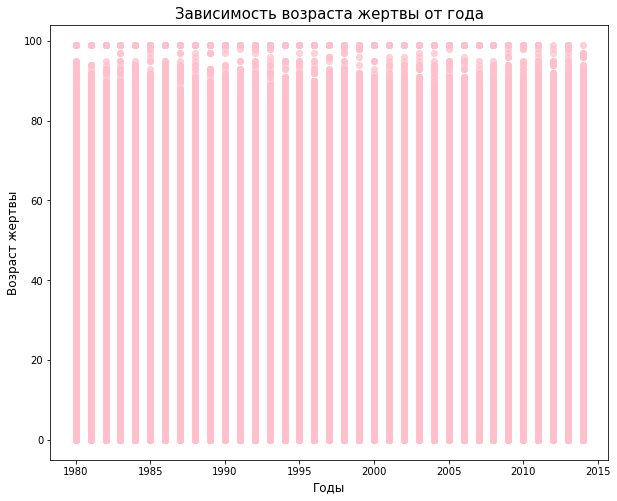

In [51]:
print('Коэффициент корреляции', 0.01)
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x = data_c['Year'], y = data_c['Victim Age'], alpha=0.7, c = 'pink')
ax.set_title('Зависимость возраста жертвы от года', fontsize=15)
ax.set_xlabel('Годы', fontsize=12)
ax.set_ylabel('Возраст жертвы', fontsize=12)
plt.show()

Между возрастом жертвы и годом наблюдается низкая положительная взаимосвязь - коэффициент равен 0.01 Можно сказать, что переменные вовсе не взаимосвязаны, что мы видим на графике

3.Year - Perpetrator Age

4.Year-Victim Count

5.Year-Perpetrator Count

6.Incident-Victim Age

7.Incident-Perpetrator Age

8.Incident-Victim Count

9. Incident-Perpetrator Count

Коэффициент корреляции 0.009


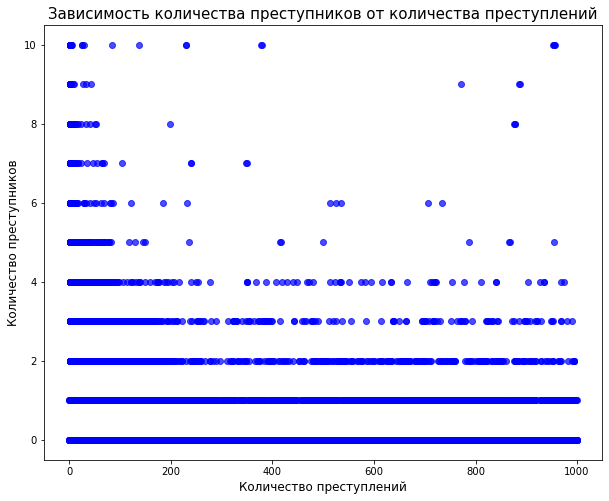

In [53]:
print('Коэффициент корреляции', 0.009)
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x = data_c['Incident'], y = data_c['Perpetrator Count'], alpha=0.7, c = 'blue')
ax.set_title('Зависимость количества преступников от количества преступлений', fontsize=15)
ax.set_xlabel('Количество преступлений', fontsize=12)
ax.set_ylabel('Количество преступников', fontsize=12)
plt.show()

Между количеством преступлений и количеством преступников наблюдается низкая положительная взаимосвязь - равная 0.009. Можно сказать, что переменные вовсе не взаимосвязаны. То же самое мы видим на графике рассеяния. 

10.Victim Age-Victim Count

Коэффициент корреляции -0.02


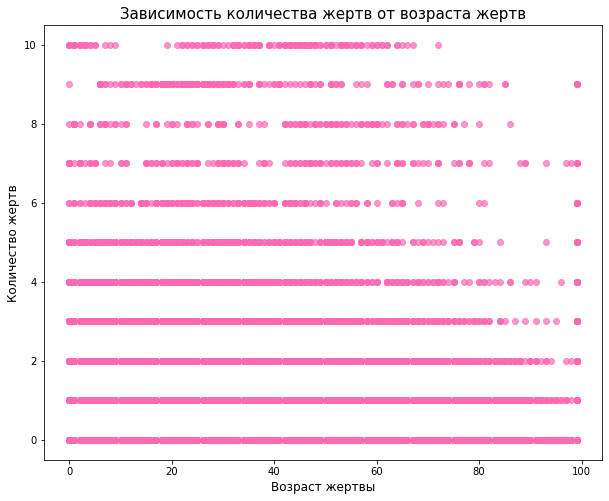

In [54]:
print('Коэффициент корреляции', -0.02)
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x = data_c['Victim Age'], y = data_c['Victim Count'], alpha=0.7, c = 'hotpink')
ax.set_title('Зависимость количества жертв от возраста жертв', fontsize=15)
ax.set_xlabel('Возраст жертвы', fontsize=12)
ax.set_ylabel('Количество жертв', fontsize=12)
plt.show()

Между возрастом жертвы и количеством жертв наблюдается низкая отрицательная взаимосвязь - коэффициент равен -0.02. То есть чем больше возраст жертвы, тем меньше количество жертв, однако можно сказать, что переменные вовсе не взаимосвязаны, что мы видим на графике, так как значения на графике противоположны расположены друг от друга.

11.Victim Age-Perpetrator Age

12.Victim Age-Perpetrator Count

13.Perpetrator Age-Victim Count

14.Perpetrator Age-Perpetrator Count


15.Victim Count-Perpetrator Count

Коэффициент корреляции 0.06


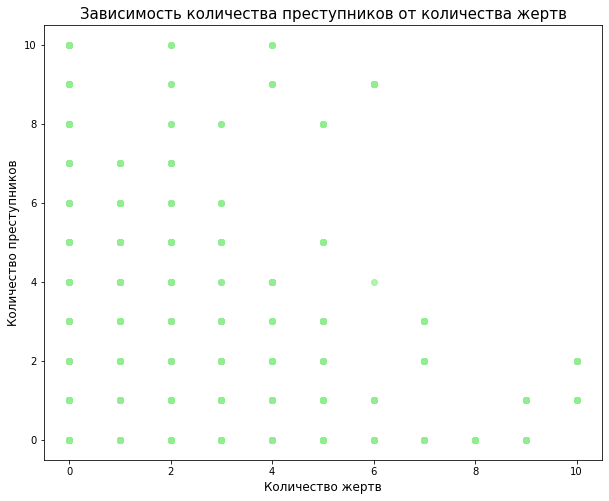

In [56]:
print('Коэффициент корреляции', 0.06)
fig, ax = plt.subplots(figsize=[10,8])
ax.scatter(x = data_c['Victim Count'], y = data_c['Perpetrator Count'], alpha=0.7, c = 'lightgreen')
ax.set_title('Зависимость количества преступников от количества жертв', fontsize=15)
ax.set_xlabel('Количество жертв', fontsize=12)
ax.set_ylabel('Количество преступников', fontsize=12)
plt.show()

Между количеством преступников и количеством жертв наблюдается низкая положительная взаимосвязь - коэффициент равен 0.06. Можно сказать, что переменные вовсе не взаимосвязаны, что мы видим на графике, так как значения расположены хаотично. 